In [85]:
from PIL import Image
from os import listdir
import pandas as pd
import numpy as np
import re
from collections import defaultdict
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D , Activation, Dropout ,  Flatten, Dense
from keras import backend as K 
from keras.preprocessing import image
import cv2
import itertools
import matplotlib.pyplot as plt
import os


from datetime import datetime
import time
# from module import *

from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import learning_curve, train_test_split
from skimage.feature import hog
from skimage import data, exposure

from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
import csv


from sklearn import preprocessing, decomposition
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from matplotlib.collections import LineCollection
from sklearn.manifold import TSNE
from sklearn.model_selection import learning_curve



In [13]:
def sift_desc(path):
    #reading the image using imread() function from cv2 module and converting it into gray image
    img = cv2.imread(path,0)
    equ = cv2.equalizeHist(img) 

    #creating a sift object and using detectandcompute() function to detect the keypoints and descriptor from the image
    sift = cv2.xfeatures2d.SIFT_create(500) # nombre de descripteur max recherché par image
    kp, desc = sift.detectAndCompute(equ, None)  # return key points and descriptors
    
    
    #drawing the keypoints and orientation of the keypoints in the image and then displaying the image as the output on the screen
    # kp_img = cv2.drawKeypoints(equ, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # cv2.imshow('SIFT', kp_img)
    # cv2.waitKey()
    return desc,sift

In [14]:
def hog(img):
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                cells_per_block=(1, 1), visualize=True, channel_axis=-1)

In [15]:



# image = data.astronaut()

# fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
#                     cells_per_block=(1, 1), visualize=True, channel_axis=-1)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# ax1.axis('off')
# ax1.imshow(image, cmap=plt.cm.gray)
# ax1.set_title('Input image')

# # Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
# ax2.set_title('Histogram of Oriented Gradients')
# plt.show()


In [16]:
# def clean(img):
    
#     img=img.convert(mode='L')
#     img_array=np.asarray(img)

#     return(list(itertools.chain.from_iterable(img_array)))
    


# Extraction

In [25]:
def extract(dic,directory,filename):
    
    # get description
    desc,sift=sift_desc(directory + '/' + filename)
    if desc is None:
        print (f"{filename} have no decriptor")
    else :
        dic['desc'].append(desc)
        dic['all_desc'].extend(desc)
        dic['name'].append(filename)
        #add target
        dic['y'].append(re.findall(r"[^\W\d]+",filename)[0])
        # load image
        img_data = Image.open(directory + '/' + filename)
        dic['img_origine'].append(img_data)

    return dic


In [26]:
img_dic = defaultdict(list)
# directory = 'photos/dataset'
directory = 'METEO_IMG'
sift_all_desc = []

for filename in listdir(directory):
    img_dic = extract(img_dic, directory, filename)


shine1118.jpeg have no decriptor
shine1136.jpeg have no decriptor
shine1141.jpeg have no decriptor
shine1142.jpeg have no decriptor
shine1143.jpeg have no decriptor
shine1151.jpeg have no decriptor
shine1154.jpeg have no decriptor
shine1159.jpeg have no decriptor
shine1165.jpeg have no decriptor
shine1166.jpeg have no decriptor
shine1177.jpeg have no decriptor
shine1186.jpeg have no decriptor
shine1210.jpeg have no decriptor
shine1211.jpeg have no decriptor
shine1215.jpeg have no decriptor
shine1228.jpeg have no decriptor
shine1232.jpeg have no decriptor
shine1243.jpeg have no decriptor
shine1250.jpeg have no decriptor
shine1251.jpeg have no decriptor
shine1262.jpeg have no decriptor
shine1270.jpeg have no decriptor
shine1276.jpeg have no decriptor
shine1281.jpeg have no decriptor
shine1283.jpeg have no decriptor
shine818.jpeg have no decriptor
shine827.jpeg have no decriptor
shine828.jpeg have no decriptor
shine829.jpeg have no decriptor
shine835.jpeg have no decriptor
shine852.jpeg h

In [ ]:
img_dic.keys()

dict_keys(['name', 'y', 'img_origine', 'desc', 'all_desc'])

In [29]:
len(img_dic['y'])

2281

In [30]:
len(img_dic['all_desc'])

936980

In [31]:
round(np.sqrt(len(img_dic['all_desc'])))

968

In [32]:
# k = 400 #round(np.sqrt(len(img_dic['sift_all_desc'])))
# k = 10 * len(set(img_dic['y']))  # 10* le nb de target unique c'est le minimum  , ici 40 

k = round(np.sqrt(len(img_dic['all_desc'])))

print(k)
batch_size = np.size(img_dic['name']) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size,
                         verbose=0).fit(img_dic['all_desc'])


968
Init 1/3 with method k-means++
Inertia for init 1/3: 1705352639.0
Init 2/3 with method k-means++
Inertia for init 2/3: 1708408030.0
Init 3/3 with method k-means++
Inertia for init 3/3: 1712830220.0
[MiniBatchKMeans] Reassigning 20 cluster centers.
Minibatch step 1/13692: mean batch inertia: 82833.21584100541
Minibatch step 2/13692: mean batch inertia: 66481.6019940274, ewa inertia: 66481.6019940274
[MiniBatchKMeans] Reassigning 44 cluster centers.
Minibatch step 3/13692: mean batch inertia: 63336.15411237212, ewa inertia: 66435.65805310615
Minibatch step 4/13692: mean batch inertia: 62778.16035198985, ewa inertia: 66382.23486358846
[MiniBatchKMeans] Reassigning 30 cluster centers.
Minibatch step 5/13692: mean batch inertia: 62145.88573229115, ewa inertia: 66320.35668867249
Minibatch step 6/13692: mean batch inertia: 62305.17716014499, ewa inertia: 66261.70902449635
[MiniBatchKMeans] Reassigning 26 cluster centers.
Minibatch step 7/13692: mean batch inertia: 61963.85545203538, ewa i

In [33]:
img_dic['desc'][0].shape

(501, 128)

# Histogram

In [34]:
def get_histo(k,desc):
    histo = np.zeros(k)
    nkp = len(desc)

    for d in desc:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
    return histo


In [35]:
kmeans.verbose = False

histo_list = []

for desc in img_dic['desc']:  # pour chaque liste de descriptor d'image
    histo=get_histo(k,desc)
    histo_list.append(histo)

features = np.asarray(histo_list,dtype=object)
    

In [36]:
df=pd.DataFrame(features)

# Training

In [37]:
species=list(set(img_dic['y']))
species=sorted(species)
species=np.array(species)

In [38]:
species

array(['cloudy', 'rain', 'shine', 'sunrise'], dtype='<U7')

In [39]:
le = preprocessing.LabelEncoder()

X = np.array(histo_list)
# Y = np.array(le.fit_transform(img_dic['y']))
Y = np.array(img_dic['y'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [41]:

mlp = MLPClassifier(verbose=0, max_iter=600000,)
mlp.fit(X, Y)

MLPClassifier(max_iter=600000, verbose=0)

In [42]:
mlp.score(X,Y)

0.9995615957913196

In [43]:
mlp2=MLPClassifier(verbose=0, max_iter=600000,random_state=0)
mlp2.fit(X_train, y_train)
mlp2.score(X_test,y_test)

0.7317397078353254

In [44]:
len(histo_list)

2281

In [45]:
len(img_dic['desc'])

2281

In [46]:
img_dic['desc'][0].shape

(501, 128)

# Prediction

In [47]:
def pred(k,desc):
    x = np.zeros(k)
    nkp = np.size(desc)

    for d in desc:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp

    res = mlp.predict_proba([x])
    row = []
    row.append(filename)

    for e in res[0]:
        row.append(e)

    result_file_obj.writerow(row)
    return res

In [48]:
result_file = open("sift.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("id", species))
results=[]

for desc in img_dic['desc']:
    
    results.append(pred(k,desc))

result_file.close()

# Test

In [49]:
test_dic = defaultdict(list)
test_directory = 'dataset_test'
test_all_desc = []

for filename in listdir(test_directory):
    # print(filename)
    test_dic = extract(test_dic, test_directory, filename)

In [50]:
len(test_dic['y'])

63

In [51]:
test_histo=[]
for desc in test_dic['desc']:
    test_histo.append(get_histo(k,desc))

In [52]:
X_testT = np.array(test_histo)
y_testT = np.array(le.fit_transform(test_dic['y']))

In [53]:
mlp.score(X,Y)

0.9995615957913196

In [54]:
mlp.score(X_testT,y_testT)

C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

In [55]:
svc = SVC()
svc.fit(X,Y)
svc.score(X_test,y_test)
# svc.score(X,Y)

0.8552456839309429

In [56]:
mlp.score(X_test,y_test) == svc.score(X_test,y_test)

False

# ACP

In [57]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.figure(figsize=(18,7), facecolor='white')
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=0.5, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            plt.figure(figsize=(10,10), facecolor="white")
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                valil = np.unique(illustrative_var)
                # On commence par traiter le NAN pour plus de lisibilité dans le graphe
                value = str(np.nan)
                if value in valil :
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=colors_dic(value, "blue"), s=100)
                    valil = valil[valil != value]
                for value in valil:
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=colors_dic.get(value, "blue"), s=100)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
                ax.set_facecolor("white")
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            fig.patch.set_facecolor("white")
            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

def display_factorial_planes_by_theme(X_projected,pca, n_comp, axis_ranks, alpha=0.5, illustrative_var=None, by_theme=False):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
            # affichage des points
            illustrative_var = np.array(illustrative_var)
            valil = np.unique(illustrative_var)

            figure, axes = plt.subplots(2,len(valil)//2)

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            
            # On commence par traiter le NAN pour plus de lisibilité dans le graphe
            value = str(np.nan)
            i = 0
            j = 0
            if value in valil :
                _display_one_scatter(X_projected, pca, axes[i][j], value, d1, d2, alpha,boundary, illustrative_var)
                valil = valil[valil != value]
                j += 1
            
            for value in valil:
                _display_one_scatter(X_projected, pca, axes[i][j], value, d1, d2, alpha,boundary, illustrative_var)
                
                j += 1
                if j >= (len(valil)//2):
                    i += 1
                    j = 0
            
            figure.set_size_inches(18.5, 7, forward=True)
            figure.set_dpi(100)
            figure.patch.set_facecolor("white")
            figure.suptitle("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def _display_one_scatter(X_projected, pca, axe,value, d1, d2, alpha, boundary, illustrative_var):
    selected = np.where(illustrative_var == value)
    c=colors_dic.get(value, "blue")
    axe.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=c, s=100)
    axe.legend()
    # nom des axes, avec le pourcentage d'inertie expliqué
    axe.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
    axe.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

    axe.set_xlim([-boundary,boundary])
    axe.set_ylim([-boundary,boundary])
    # affichage des lignes horizontales et verticales
    axe.plot([-100, 100], [0, 0], color='grey', ls='--')
    axe.plot([0, 0], [-100, 100], color='grey', ls='--')
    axe.set_facecolor("white")

In [58]:
# selection des colonnes à prendre en compte dans l'ACP
df_centre_reduit = pd.DataFrame(X)
print("{:_} NAN".format(df_centre_reduit.isna().sum().sum()))
df_centre_reduit.shape

0 NAN


(2281, 968)

In [59]:
df_centre_reduit

,0,1,2,3,4,5,6,7,8,9,...,958,959,960,961,962,963,964,965,966,967
0,0.000000,0.000,0.0,0.000,0.000,0.001996,0.000,0.000,0.000,0.000,...,0.003992,0.000000,0.001996,0.000000,0.000,0.000,0.000,0.003992,0.000000,0.000000
1,0.000000,0.006,0.0,0.000,0.000,0.000000,0.002,0.000,0.002,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.002,0.002,0.000000,0.000000,0.000000
2,0.000000,0.000,0.0,0.002,0.000,0.000000,0.000,0.000,0.000,0.002,...,0.000000,0.000000,0.000000,0.000000,0.000,0.006,0.008,0.000000,0.000000,0.000000
3,0.000000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,0.002,0.000,...,0.000000,0.002000,0.002000,0.002000,0.004,0.000,0.000,0.000000,0.000000,0.000000
4,0.001996,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,...,0.000000,0.001996,0.001996,0.001996,0.000,0.000,0.000,0.000000,0.001996,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,0.000000,0.000,0.0,0.002,0.008,0.000000,0.000,0.002,0.002,0.000,...,0.000000,0.000000,0.002000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000000
2277,0.000000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,0.026000,0.000,0.000,0.000,0.000000,0.008000,0.000000
2278,0.007692,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,...,0.007692,0.000000,0.000000,0.015385,0.000,0.000,0.000,0.000000,0.007692,0.007692
2279,0.006000,0.000,0.0,0.002,0.000,0.000000,0.000,0.000,0.000,0.000,...,0.010000,0.002000,0.006000,0.002000,0.000,0.000,0.000,0.004000,0.002000,0.000000


In [60]:
# choix du nombre de composantes à calculer
ACP_NB_COMPOSANTES = df_centre_reduit.shape[1]

# préparation des données pour l'ACP
X_acp = df_centre_reduit.values
names = df_centre_reduit.index # ou data.index pour avoir les intitulés
features = df_centre_reduit.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X_acp)
X_scaled = std_scale.transform(X_acp)

# calculer les composantes principales
pca = decomposition.PCA(n_components=ACP_NB_COMPOSANTES)
x_projeected = pca.fit_transform(X_scaled)
pd.DataFrame(x_projeected, index=df_centre_reduit.index, columns=["F"+str(i+1) for i in range(ACP_NB_COMPOSANTES)])

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F959,F960,F961,F962,F963,F964,F965,F966,F967,F968
0,-8.422556,2.108991,-1.310166,3.893511,1.894799,1.835753,10.494560,-0.416187,4.469193,-9.289855,...,-0.508369,0.002273,-0.093534,-0.171669,0.033580,-0.005049,-0.064011,0.075968,-0.016644,3.042566e-14
1,-3.722433,-10.102458,0.440564,-0.718321,2.035478,3.313242,7.688666,2.808996,-0.163796,-1.313075,...,0.419343,0.115636,0.141913,-0.028274,0.223291,-0.144120,-0.200332,-0.074845,0.084865,6.688158e-15
2,-1.767964,-9.538846,-2.980891,-3.416290,2.250367,2.374837,6.555206,5.323256,-1.152861,-2.484047,...,0.227819,0.068240,-0.121836,0.101120,-0.088792,0.063852,-0.157608,-0.052600,-0.214734,-2.558729e-15
3,-1.572180,-10.230928,-0.361871,-2.012854,0.663520,1.471201,4.475864,0.506028,-0.899668,-1.538149,...,0.097588,-0.122437,0.104764,-0.077818,0.133644,-0.026886,0.251509,-0.139558,-0.097667,4.400546e-15
4,-4.233362,-5.756149,-1.475623,-2.637305,0.082316,1.046663,2.675913,0.637672,-2.360857,0.459913,...,-0.087825,0.287796,-0.390921,-0.007200,0.150169,0.354437,-0.130586,0.088308,-0.017279,8.333215e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,13.567452,10.593477,-0.787937,-4.172944,3.310970,2.155119,4.339683,3.165846,3.646613,5.730058,...,-0.013385,0.048208,-0.086251,0.211229,-0.236511,-0.082118,0.062235,0.125440,0.015932,1.777468e-15
2277,-10.945023,12.337166,-4.125925,5.684466,-2.361282,-3.518645,1.605098,3.637571,4.107001,-7.622453,...,0.049244,0.189481,-0.007287,-0.039198,0.073782,0.068024,-0.062565,-0.095723,-0.089697,9.106371e-16
2278,-7.236765,1.583702,-0.233878,2.462380,-2.191838,4.388652,-2.811309,-1.710304,-0.427328,2.192192,...,-0.008855,-0.060896,0.152549,0.305962,0.037549,-0.047207,-0.032647,-0.101349,-0.186532,1.181423e-15
2279,-7.073585,6.639628,-1.448064,3.096744,-0.617015,-1.644395,0.389628,2.470404,-1.168245,0.427549,...,-0.067049,-0.128350,-0.192431,0.020486,-0.063949,-0.173242,0.034687,0.018211,-0.037408,1.369959e-15


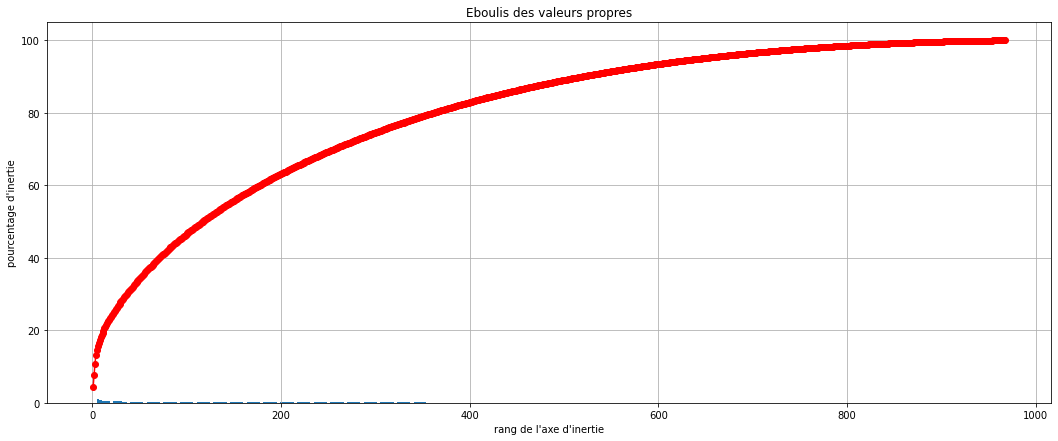

In [61]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=ACP_NB_COMPOSANTES)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

In [62]:
# choix du nombre de composantes à calculer
ACP_NB_COMPOSANTES = 150

axis_ranks = []

for i in range (0, ACP_NB_COMPOSANTES, 2):
    axis_ranks.append((i,i+1))
# axis_ranks

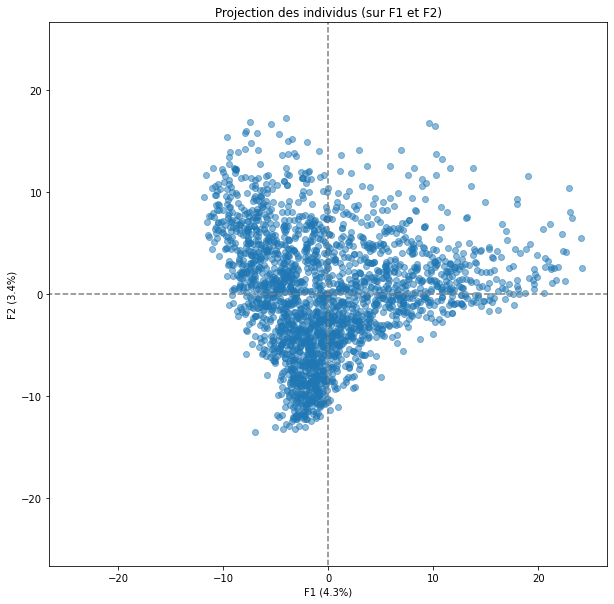

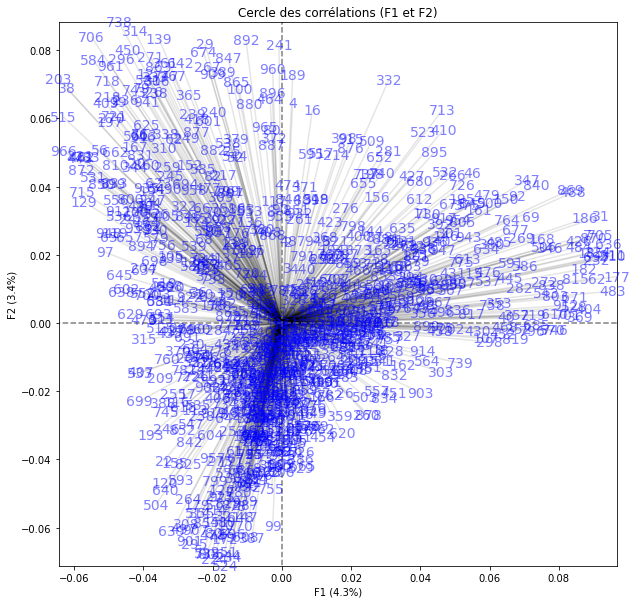

ValueError: Number of columns must be a positive integer, not 0

<Figure size 432x288 with 0 Axes>

In [64]:
# Projection des individus
X_projected = pca.transform(X_scaled)
pcs = pca.components_

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
# theme = [df_origin.loc[index, "y"] for index in df_centre_reduit.index]

for rank in axis_ranks:
    # Projection des individus
    display_factorial_planes(X_projected, ACP_NB_COMPOSANTES, pca, [rank])
    # Cercle des corrélations
    display_circles(pcs, ACP_NB_COMPOSANTES, pca, [rank], labels = np.array(features))
    display_factorial_planes_by_theme(X_projected, pca, ACP_NB_COMPOSANTES, [rank], by_theme=True)

In [65]:
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X_projected, Y, test_size=0.33, random_state=42)

In [66]:
mlp_acp = MLPClassifier(verbose=0, max_iter=600000, random_state=42)
mlp_acp.fit(X_trainA, y_trainA)
mlp_acp.score(X_testA, y_testA)

0.6427622841965471

In [67]:
# # selection des colonnes à prendre en compte dans l'ACP
# df_centre_reduit_test = pd.DataFrame(X_test.copy())
# print("{:_} NAN".format(df_centre_reduit_test.isna().sum().sum()))
# print(df_centre_reduit_test.shape)

# # préparation des données pour l'ACP
# X_acp_test = df_centre_reduit_test.values
# names_test = df_centre_reduit_test.index # ou data.index pour avoir les intitulés
# features_test = df_centre_reduit_test.columns

# # Centrage et Réduction
# std_scale_test = preprocessing.StandardScaler().fit(X_acp_test)
# X_scaled_test = std_scale.transform(X_acp_test)

# # calculer les composantes principales
# round(mlp_acp.score(X_acp_test, y_test),2)

# T-SNE

In [68]:
from sklearn.manifold import TSNE

In [69]:
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(X)

C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### - 2D

In [70]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, columns=columns)
X_tsne.head()

,DIM1,DIM2
0,-13.455565,-31.767595
1,-6.335570,41.158031
2,-9.319338,42.324249
3,-4.333443,37.744022
4,-7.666464,29.615595


In [71]:
dict_colors = {'cloudy': 'forestgreen', 'rain': 'royalblue', 'shine': 'orange', 'sunrise': 'crimson'} 
y_colors = [dict_colors[yi] for yi in Y]

<AxesSubplot:xlabel='DIM1', ylabel='DIM2'>

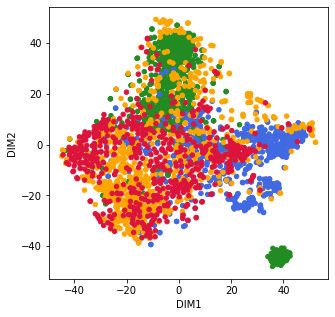

In [72]:
X_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color=y_colors)

### - 3D

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [75]:
tsne = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [76]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, columns=columns)
X_tsne.head()

,DIM1,DIM2,DIM3
0,-42.475548,51.138294,-5.945463
1,5.267910,-69.388542,-13.248734
2,-3.225407,-75.675575,-31.497669
3,15.968561,-51.029877,1.287737
4,-2.370626,-35.473640,-29.466108


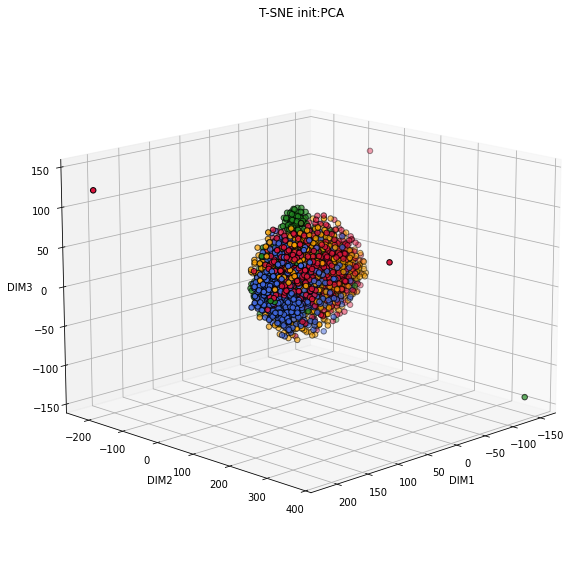

In [77]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.set_title("T-SNE init:PCA ")
ax.view_init(elev=15, azim=45)

In [78]:
tsne.kl_divergence_

2.177811622619629

# Learning curve

[ 76 152 229 305 382 458 534 611 687 764]


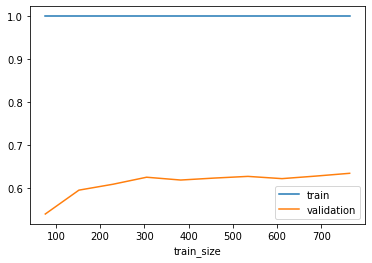

In [ ]:
N, train_score, val_score = learning_curve(KNeighborsClassifier(algorithm= 'auto', n_jobs= -1, weights= 'distance'), X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_size')
plt.legend()

[ 76 152 229 305 382 458 534 611 687 764]


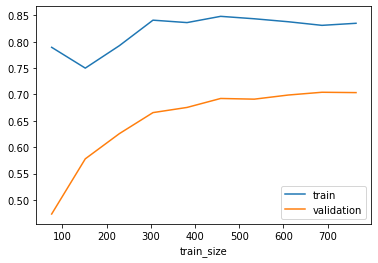

In [87]:
N, train_score, val_score = learning_curve(SVC(), X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_size')
plt.legend()

In [ ]:
N, train_score, val_score = learning_curve(MLPClassifier(iteration=6000), X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=2)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_size')
plt.legend()

C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\e_goy\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
plop()

TypeError: 'int' object is not callable